<a href="https://colab.research.google.com/github/seifahmed2004/ML-Project/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import KFold

In [12]:
df = pd.read_csv("/content/mhealth_raw_data.csv")
df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.18490,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.64990,-4.5781,0.187760,-0.44902,-1.01030,0.034483,0.0,subject1
1,2.38760,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.62750,-4.3198,0.023595,-0.44902,-1.01030,0.034483,0.0,subject1
2,2.40860,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.50550,-4.2772,0.275720,-0.44902,-1.01030,0.034483,0.0,subject1
3,2.18140,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.62790,-4.3163,0.367520,-0.45686,-1.00820,0.025862,0.0,subject1
4,2.41730,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.70080,-4.1459,0.407290,-0.45686,-1.00820,0.025862,0.0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931510,3.18420,0.9097,-2.09980,-0.246750,0.18199,-1.13360,-2.18520,-3.2740,7.596700,-0.51176,-0.99384,0.084052,0.0,subject8
931511,1.57830,2.0362,-0.34074,-0.261600,0.31520,-1.10610,-3.05030,-7.6909,6.907100,-0.50392,-0.98357,0.064655,0.0,subject8
931512,1.07330,2.2315,0.38273,-0.261600,0.31520,-1.10610,-3.65100,-8.3685,6.154500,-0.50392,-0.98357,0.064655,0.0,subject8
931513,0.89155,2.2734,0.61217,-0.261600,0.31520,-1.10610,0.18094,-5.2993,5.068400,-0.50392,-0.98357,0.064655,0.0,subject8


In [13]:
le = LabelEncoder()
df['subject_encoded'] = le.fit_transform(df['subject'])
df.drop(columns=['subject'], inplace=True)

In [14]:
df_subset = df.sample(n=10000, random_state=42)
df_subset

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject_encoded
892815,4.07480,-14.9450,-4.40440,-0.424860,-0.92871,-0.025540,-3.48290,-14.8330,-0.29373,-0.009804,-0.942510,-0.573280,4.0,7
359716,3.35020,-6.1352,1.33090,0.387760,-0.83677,-0.351670,-1.29560,-13.3140,-1.37400,-0.792160,-0.683780,0.323280,0.0,2
762064,2.22000,-9.7831,-2.07110,-0.497220,-0.91182,0.009823,-1.25790,-13.7680,5.18660,-0.645100,-0.862420,0.090517,0.0,6
876066,2.20640,-9.6964,-2.31690,0.365490,-0.30582,0.337920,-8.78350,-3.1783,3.17440,-0.150980,-0.043121,0.840520,0.0,7
612953,-8.72280,-8.5567,-0.22340,-0.565860,-0.82739,0.333990,-7.46960,-3.8373,3.26650,-0.823530,-0.655030,0.094828,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700134,2.94270,-9.5539,1.04130,0.361780,-0.57036,0.577600,-7.62830,1.2087,0.87294,-0.315690,1.000000,0.271550,0.0,5
710691,3.63740,-19.1280,11.95500,-0.380330,0.12195,-1.058900,-4.71940,16.4380,1.83230,0.221570,-1.090300,-0.226290,11.0,5
848882,2.18850,-9.6130,1.07250,-0.456400,-0.81426,0.367390,-3.66110,-8.7870,2.30020,-0.890200,-0.468170,0.346980,0.0,6
608888,9.45070,-11.0600,18.70800,-0.029685,-0.19137,0.919450,-1.08190,-8.4512,8.87950,-0.323530,-0.012320,1.146600,0.0,4


In [15]:
df_subset = df.sample(n=10000, random_state=42)
X = df_subset.drop(columns=['Activity'])
y = df_subset['Activity']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

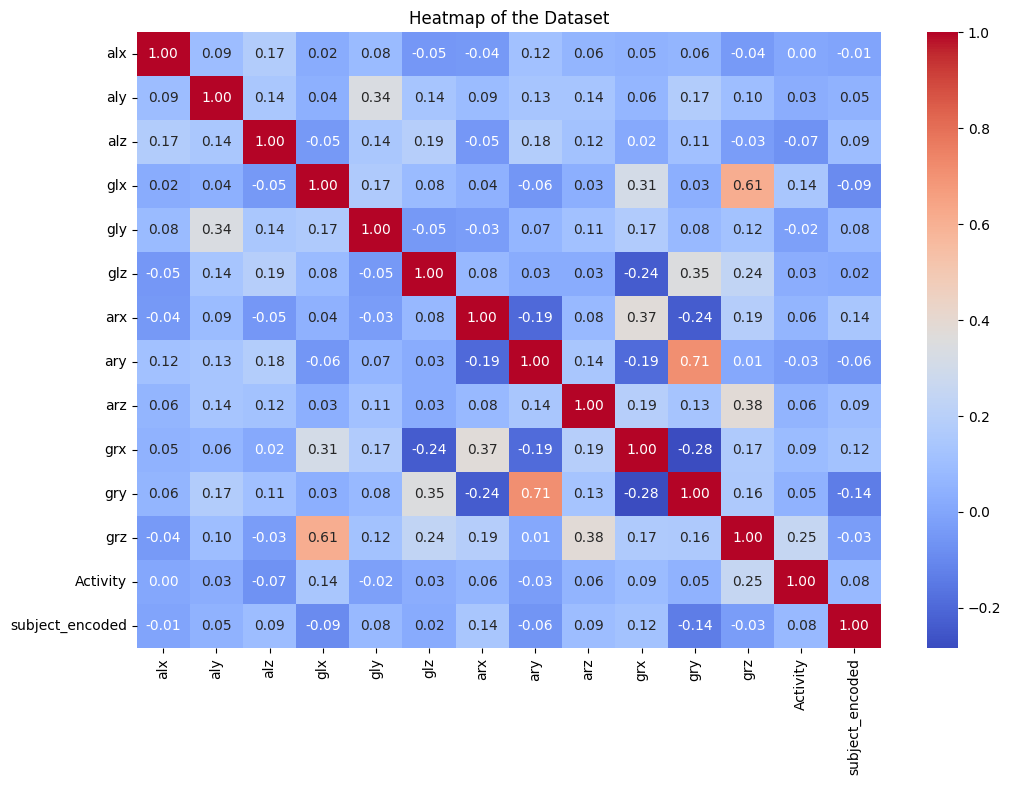

In [7]:
numeric_columns = df.select_dtypes(include=['int', 'float'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of the Dataset')
plt.show()

<Axes: >

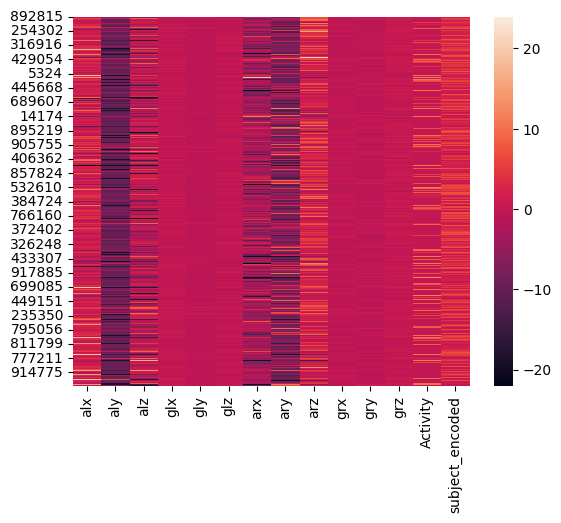

In [17]:
import seaborn as sns
sns.heatmap(df_subset)

Sample data points:
      alx     aly      alz       glx      gly      glz     arx     ary  \
0  2.1849 -9.6967  0.63077  0.103900 -0.84053 -0.68762 -8.6499 -4.5781   
1  2.3876 -9.5080  0.68389  0.085343 -0.83865 -0.68369 -8.6275 -4.3198   
2  2.4086 -9.5674  0.68113  0.085343 -0.83865 -0.68369 -8.5055 -4.2772   
3  2.1814 -9.4301  0.55031  0.085343 -0.83865 -0.68369 -8.6279 -4.3163   
4  2.4173 -9.3889  0.71098  0.085343 -0.83865 -0.68369 -8.7008 -4.1459   

        arz      grx     gry       grz  Activity  subject_encoded  
0  0.187760 -0.44902 -1.0103  0.034483       0.0                0  
1  0.023595 -0.44902 -1.0103  0.034483       0.0                0  
2  0.275720 -0.44902 -1.0103  0.034483       0.0                0  
3  0.367520 -0.45686 -1.0082  0.025862       0.0                0  
4  0.407290 -0.45686 -1.0082  0.025862       0.0                0  


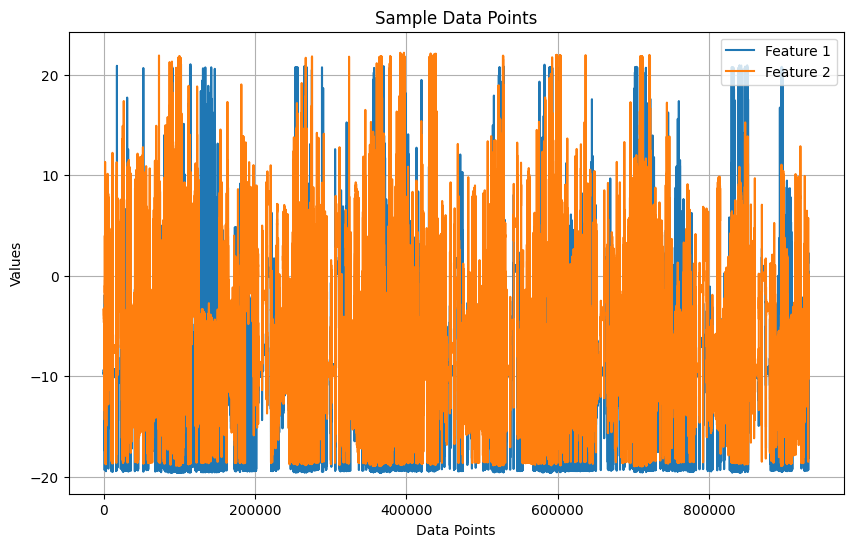

In [18]:
#Visualization of sample data points
print("Sample data points:")
print(df.head())
plt.figure(figsize=(10, 6))

plt.plot(df['aly'], label='Feature 1')
plt.plot(df['ary'], label='Feature 2')

plt.title('Sample Data Points')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
X.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,subject_encoded
892815,4.0748,-14.9450,-4.4044,-0.42486,-0.92871,-0.025540,-3.4829,-14.8330,-0.29373,-0.009804,-0.942510,-0.573280,7
359716,3.3502,-6.1352,1.3309,0.38776,-0.83677,-0.351670,-1.2956,-13.3140,-1.37400,-0.792160,-0.683780,0.323280,2
762064,2.2200,-9.7831,-2.0711,-0.49722,-0.91182,0.009823,-1.2579,-13.7680,5.18660,-0.645100,-0.862420,0.090517,6
876066,2.2064,-9.6964,-2.3169,0.36549,-0.30582,0.337920,-8.7835,-3.1783,3.17440,-0.150980,-0.043121,0.840520,7
612953,-8.7228,-8.5567,-0.2234,-0.56586,-0.82739,0.333990,-7.4696,-3.8373,3.26650,-0.823530,-0.655030,0.094828,4


In [20]:
y.head()

892815    4.0
359716    0.0
762064    0.0
876066    0.0
612953    0.0
Name: Activity, dtype: float64

In [21]:
df_no_duplicates = df.drop_duplicates()
print("Original DataFrame shape:", df.shape)
print("DataFrame shape after removing duplicates:", df_no_duplicates.shape)

Original DataFrame shape: (931515, 14)
DataFrame shape after removing duplicates: (931515, 14)


In [22]:
print (f"training set size: {X_train.shape[0]} samples \ntest set size: {X_test.shape[0]} samples ")

training set size: 8000 samples 
test set size: 2000 samples 


linear regression


In [24]:
from sklearn.linear_model import LinearRegression
modelL = LinearRegression()
modelL.fit(X_train_normalized, y_train)

LinearRegression()

In [27]:
from sklearn.model_selection import cross_val_score

linearRegressionCrossVakidation = cross_val_score(modelL, X_train_normalized, y_train, cv=5, scoring='neg_mean_squared_error')
linearRegressionCrossVakidation

array([ -9.0360783 , -10.01029688,  -9.97236547,  -9.09197383,
       -10.07047384])

In [34]:
lin_reg_y_pred = modelL.predict(X_test_normalized)
lin_reg_mse = mean_squared_error(y_test, lin_reg_y_pred)
lin_reg_rmse = np.sqrt(lin_reg_mse)

In [36]:
print("Cross Validation Linear Regression Mean Squared Error : ", np.mean(np.abs(linearRegressionCrossVakidation)))
print("Mean Squared Error: ", lin_reg_mse)
print("Root Mean Squared Error: ", lin_reg_rmse)

Cross Validation Linear Regression Mean Squared Error :  9.63623766660517
Mean Squared Error:  9.379899062941695
Root Mean Squared Error:  3.0626620876194774


KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
knn_params = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
grid_search_knn = GridSearchCV(knn, knn_params, cv=5)
grid_search_knn.fit(X_train_normalized, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']})

In [38]:
best_knn = grid_search_knn.best_estimator_
knn_y_pred = best_knn.predict(X_test_normalized)
knn_accuracy = accuracy_score(y_test, knn_y_pred)

In [109]:
best_knn = grid_search_knn.best_estimator_
cv_scores = cross_val_score(best_knn, X_train_normalized, y_train, cv=3, scoring='accuracy')

In [39]:
print("knn accuracy:", knn_accuracy)

knn accuracy: 0.848


In [40]:
conf_matrix = confusion_matrix(y_test, knn_y_pred)
conf_matrix

array([[1262,   19,   22,   14,   16,   13,   16,   13,   11,   26,   10,
           7,    3],
       [   2,   48,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   4,    0,   49,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   5,    0,    0,   54,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [  21,    0,    0,    0,   34,    0,    0,    0,    0,    0,    0,
           0,    0],
       [  20,    0,    1,    0,    0,   26,    1,    0,    1,    0,    0,
           0,    0],
       [  10,    0,    0,    0,    0,    0,   49,    0,    0,    0,    0,
           0,    0],
       [  17,    0,    0,    0,    0,    0,    0,   37,    0,    0,    0,
           0,    0],
       [  12,    0,    0,    0,    0,    0,    0,    0,   47,    0,    0,
           0,    0],
       [   8,    0,    0,    0,    0,    0,    0,    0,    0,   29,    0,
           0,    0],
       [  12,    0,    0,    0,    0,    0,    0, 

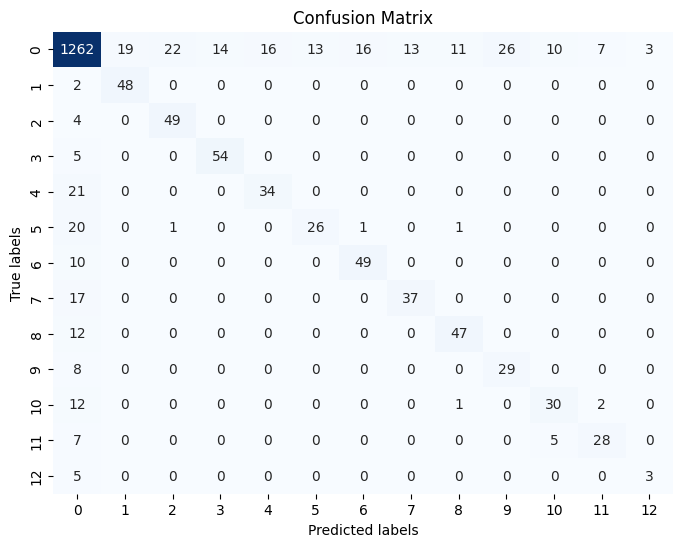

In [41]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


SVM

In [43]:
c_values = [0.1 , 1 , 10]
gamma_values = [0.01 , 0.1 , 1]
# crossvalidation = KFold(n_splits=10, random_state=None, shuffle=False)
for gamma in gamma_values:
  for c in c_values:
      svm = SVC(C=c, gamma=gamma)
      svm.fit(X_train, y_train)
      svm_pred = svm.predict(X_test)
      accuracy = accuracy_score(y_test,svm_pred)
      mean_accuracy = np.mean(accuracy)
      std_accuracy = np.std(accuracy)
      print("Gamma:", gamma, "C:", c, "Mean Accuracy:", mean_accuracy, "Std Accuracy:", std_accuracy)

Gamma: 0.01 C: 0.1 Mean Accuracy: 0.728 Std Accuracy: 0.0
Gamma: 0.01 C: 1 Mean Accuracy: 0.7565 Std Accuracy: 0.0
Gamma: 0.01 C: 10 Mean Accuracy: 0.7865 Std Accuracy: 0.0
Gamma: 0.1 C: 0.1 Mean Accuracy: 0.734 Std Accuracy: 0.0
Gamma: 0.1 C: 1 Mean Accuracy: 0.786 Std Accuracy: 0.0
Gamma: 0.1 C: 10 Mean Accuracy: 0.8125 Std Accuracy: 0.0
Gamma: 1 C: 0.1 Mean Accuracy: 0.748 Std Accuracy: 0.0
Gamma: 1 C: 1 Mean Accuracy: 0.778 Std Accuracy: 0.0
Gamma: 1 C: 10 Mean Accuracy: 0.79 Std Accuracy: 0.0


In [44]:
Best_SVM = SVC(C=10, gamma=0.1)
cv_scores = cross_val_score(Best_SVM, X_train_normalized, y_train, cv=3, scoring='accuracy')
print(f"Cross-validation scores :  {cv_scores} , Score : {cv_scores.mean()} , STD Scores {cv_scores.std()}  ")

Cross-validation scores :  [0.80989876 0.79902512 0.79894974] , Score : 0.8026245406495981 , STD Scores 0.00514374377518834  


In [45]:
print("SVM accuracy: ",accuracy)

SVM accuracy:  0.79


In [101]:
conf_matrix = confusion_matrix(y_test, svm_pred)
conf_matrix

array([[1384,   15,   14,   14,    0,    0,    3,    0,    2,    0,    0,
           0,    0],
       [   3,   47,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   1,    0,   52,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   4,    0,    0,   55,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [  45,    0,    0,    0,   10,    0,    0,    0,    0,    0,    0,
           0,    0],
       [  47,    0,    0,    0,    0,    2,    0,    0,    0,    0,    0,
           0,    0],
       [  41,    0,    0,    0,    0,    0,   18,    0,    0,    0,    0,
           0,    0],
       [  46,    0,    0,    0,    0,    0,    0,    8,    0,    0,    0,
           0,    0],
       [  55,    0,    0,    0,    0,    0,    0,    0,    4,    0,    0,
           0,    0],
       [  37,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [  45,    0,    0,    0,    0,    0,    0, 

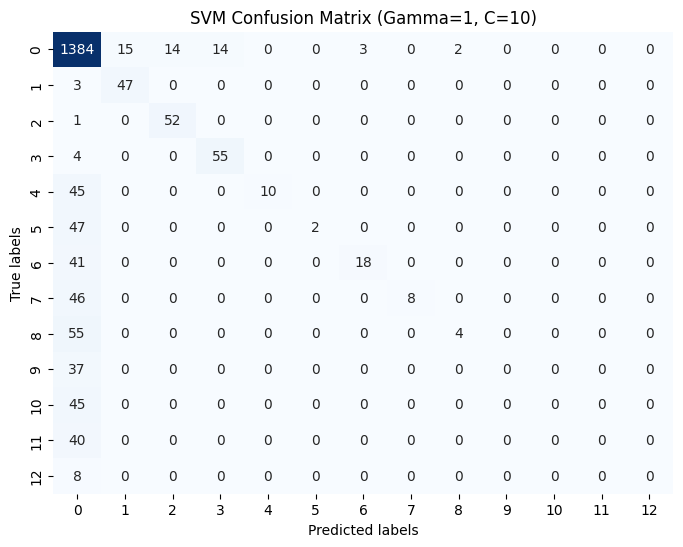

In [104]:

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("SVM Confusion Matrix (Gamma={}, C={})".format(gamma,c))
plt.show()


NN

In [62]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [64]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense #makes summation, activation
import matplotlib.pyplot as plt
from keras.optimizers import SGD, Adam


In [68]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1)).toarray()
y_test_encoded = encoder.fit_transform(y_test.values.reshape(-1, 1)).toarray()


In [74]:
from tensorflow.keras.layers import Dense, Dropout, ReLU, LeakyReLU

num_classes = y_train_encoded.shape[1]

model = Sequential([
    Dense(units=128, input_shape=(X_train_normalized.shape[1],)),
    ReLU(),
    Dropout(0.5),
    Dense(units=256),
    LeakyReLU(),
    Dropout(0.5),
    Dense(units=num_classes, activation="softmax")
])


In [75]:
optimizer = Adam(learning_rate=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)


In [76]:
Train = model.fit(X_train_normalized, y_train_encoded, epochs=50, batch_size=64, validation_data=(X_test_normalized, y_test_encoded))

# Make predictions
y_pred_prob = model.predict(X_test_normalized)
y_pred = np.argmax(y_pred_prob, axis=-1)


Epoch 1/50
125/125 [==============================] - 2s 9ms/step - loss: 1.3152 - accuracy: 0.7084 - val_loss: 1.0162 - val_accuracy: 0.7270
Epoch 2/50
125/125 [==============================] - 1s 6ms/step - loss: 1.0389 - accuracy: 0.7287 - val_loss: 0.8737 - val_accuracy: 0.7335
Epoch 3/50
125/125 [==============================] - 1s 5ms/step - loss: 0.9345 - accuracy: 0.7318 - val_loss: 0.8017 - val_accuracy: 0.7375
Epoch 4/50
125/125 [==============================] - 0s 3ms/step - loss: 0.8819 - accuracy: 0.7339 - val_loss: 0.7507 - val_accuracy: 0.7475
Epoch 5/50
125/125 [==============================] - 0s 4ms/step - loss: 0.8527 - accuracy: 0.7350 - val_loss: 0.7226 - val_accuracy: 0.7415
Epoch 6/50
125/125 [==============================] - 0s 4ms/step - loss: 0.8056 - accuracy: 0.7420 - val_loss: 0.6916 - val_accuracy: 0.7570
Epoch 7/50
125/125 [==============================] - 0s 4ms/step - loss: 0.7922 - accuracy: 0.7393 - val_loss: 0.6724 - val_accuracy: 0.7565
Epoch 

In [80]:
y_pred_prob = model.predict(X_test_normalized)
y_pred = np.argmax(y_pred_prob, axis=-1)

63/63 [==============================] - 0s 2ms/step


In [81]:
accuracy = accuracy_score(np.argmax(y_test_encoded, axis=-1), y_pred)
precision = precision_score(np.argmax(y_test_encoded, axis=-1), y_pred, average='weighted')
recall = recall_score(np.argmax(y_test_encoded, axis=-1), y_pred, average='weighted')
f1 = f1_score(np.argmax(y_test_encoded, axis=-1), y_pred, average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [107]:
conf_matrix = confusion_matrix(np.argmax(y_test_encoded, axis=-1), y_pred)
conf_matrix

array([[1314,   16,   24,   26,    3,    1,    5,    3,    4,   17,   12,
           7,    0],
       [  10,   40,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   0,    0,   53,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   0,    0,    0,   59,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [  50,    0,    0,    0,    5,    0,    0,    0,    0,    0,    0,
           0,    0],
       [  49,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [  46,    0,    0,    0,    0,    0,   13,    0,    0,    0,    0,
           0,    0],
       [  33,    0,    0,    0,    0,    0,    0,   21,    0,    0,    0,
           0,    0],
       [  43,    0,    0,    0,    0,    0,    0,    0,   16,    0,    0,
           0,    0],
       [   7,    0,    0,    0,    0,    0,    0,    0,    0,   30,    0,
           0,    0],
       [  17,    0,    0,    0,    0,    0,    0, 

In [83]:
print("NN Accuracy:", accuracy)

NN Accuracy: 0.7995


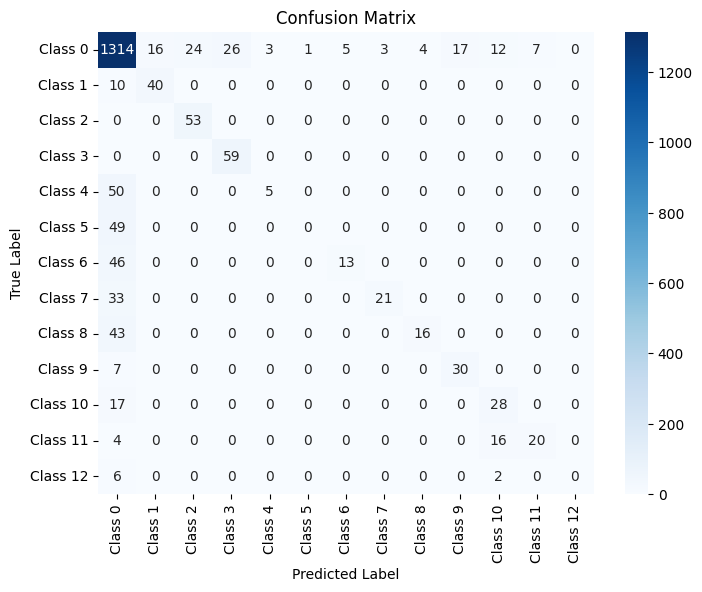

In [87]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",xticklabels=['Class {}'.format(i) for i in range(conf_matrix.shape[1])],yticklabels=['Class {}'.format(i) for i in range(conf_matrix.shape[0])])
plt.title("NN Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Logistic regression

In [88]:
#Define sigmoid function
def sigmoid(z):
    #output > 0.5 when z is positive
    #output < 0.5 when z is negative
    return 1/(1+np.exp(-z)) # Output in range [0,1]

In [89]:
x= np.arange(-20,20)
y= np.round(sigmoid(x),2)

Text(0, 0.5, 'Logistic/sigmoid function applied')

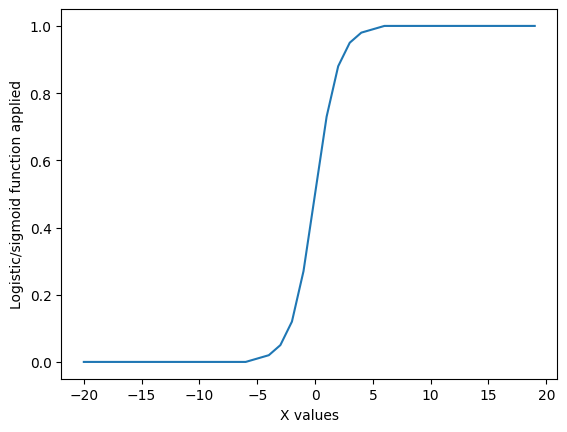

In [90]:
plt.plot(x, y)
plt.xlabel('X values')
plt.ylabel('Logistic/sigmoid function applied')

In [91]:
df.isna().sum()

alx                0
aly                0
alz                1
glx                1
gly                1
glz                1
arx                1
ary                1
arz                1
grx                1
gry                1
grz                1
Activity           1
subject_encoded    0
dtype: int64

In [92]:
df.duplicated().sum()

0

In [93]:
df['alx'].value_counts()

alx
 19.596000    207
 19.586000    194
 19.575000    135
 19.606000    126
 19.616000     69
             ... 
-0.524240       1
-0.630590       1
-0.556930       1
-0.527940       1
-0.058215       1
Name: count, Length: 286192, dtype: int64

In [94]:
logisticmodel = LogisticRegression()
logisticmodel.fit(X_train,y_train)
predictions = logisticmodel.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [106]:
LogisticRegressionCV_scores = cross_val_score(logisticmodel, X_train_normalized, y_train, cv=3, scoring='accuracy')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [95]:
accuracy = accuracy_score(y_test, predictions)
print("Logistic regression accuracy:", accuracy)


Logistic regression accuracy: 0.7245


In [98]:
confusion_matrix(y_test, y_pred)

array([[1314,   16,   24,   26,    3,    1,    5,    3,    4,   17,   12,
           7,    0],
       [  10,   40,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   0,    0,   53,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   0,    0,    0,   59,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [  50,    0,    0,    0,    5,    0,    0,    0,    0,    0,    0,
           0,    0],
       [  49,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [  46,    0,    0,    0,    0,    0,   13,    0,    0,    0,    0,
           0,    0],
       [  33,    0,    0,    0,    0,    0,    0,   21,    0,    0,    0,
           0,    0],
       [  43,    0,    0,    0,    0,    0,    0,    0,   16,    0,    0,
           0,    0],
       [   7,    0,    0,    0,    0,    0,    0,    0,    0,   30,    0,
           0,    0],
       [  17,    0,    0,    0,    0,    0,    0, 

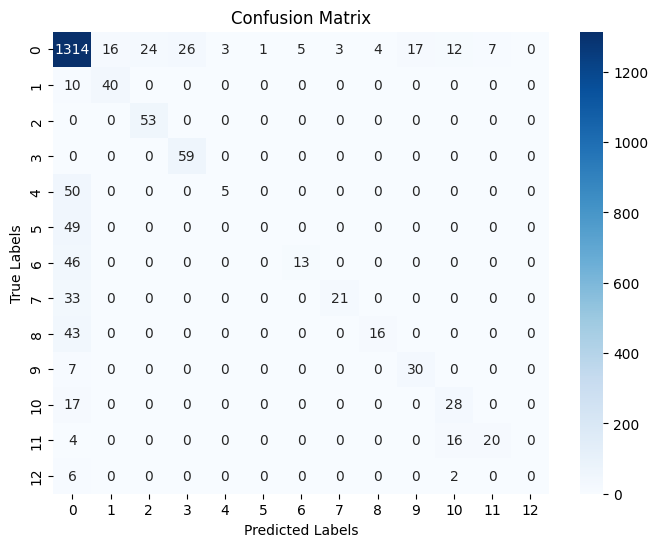

In [99]:
from sklearn.metrics import confusion_matrix
# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred)
, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()